# Description

It uses the `clustree` package to generate clustering tree visualizations.

# Modules loading

In [1]:
library(clustree)
library(tidyverse)

Loading required package: ggraph

Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Settings

In [2]:
CLUSTERING_DIR <- Sys.getenv("PHENOPLIER_RESULTS_CLUSTERING_DIR")

In [3]:
CLUSTERING_DIR

[1] "/opt/data/results/clustering"

In [4]:
CONSENSUS_CLUSTERING_DIR <- file.path(CLUSTERING_DIR, "consensus_clustering")

In [5]:
CONSENSUS_CLUSTERING_DIR

[1] "/opt/data/results/clustering/consensus_clustering"

In [6]:
MANUSCRIPT_FIGURES_DIR <- Sys.getenv("PHENOPLIER_MANUSCRIPT_FIGURES_DIR")

In [7]:
if (MANUSCRIPT_FIGURES_DIR == "") {
  MANUSCRIPT_FIGURES_DIR <- "/tmp"
}

In [8]:
MANUSCRIPT_FIGURES_DIR

[1] "/opt/manuscript/content/images"

In [9]:
OUTPUT_FIG_DIR <- file.path(MANUSCRIPT_FIGURES_DIR, "clustering")
dir.create(OUTPUT_FIG_DIR, recursive = TRUE)

In [10]:
OUTPUT_FIG_DIR

[1] "/opt/manuscript/content/images/clustering"

# Load data

In [11]:
data <- read_tsv(file.path(CONSENSUS_CLUSTERING_DIR, "clustering_tree_data.tsv"))

Rows: 3752 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): trait
dbl (25): PCA1, PCA2, PCA3, PCA4, PCA5, UMAP1, UMAP2, UMAP3, UMAP4, UMAP5, k...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
dim(data)

[1] 3752   26

In [13]:
head(data)

trait,PCA1,PCA2,PCA3,PCA4,PCA5,UMAP1,UMAP2,UMAP3,UMAP4,⋯,k8,k19,k7,k23,k25,k16,k26,k6,k28,k24
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100001_raw-Food_weight,0.80521563,-0.865389766,0.6994802,-0.06597626,0.9996165,0.6198668,0.3759657,7.533449,0.7480853,⋯,0,0,5,3,0,0,0,0,0,1
100002_raw-Energy,0.58850738,-1.491772157,1.7563401,-3.59329473,2.1006066,-0.8673728,0.9656434,9.720926,1.7857884,⋯,0,0,5,18,18,0,21,0,21,19
100003_raw-Protein,1.91015954,-1.873687235,1.8766772,-3.83255651,1.2407043,-0.9068678,0.9959052,9.759442,1.7785940,⋯,0,0,5,18,18,0,21,0,21,19
100004_raw-Fat,0.75079911,-0.294732888,1.3177099,-1.34608112,2.0064032,-0.7585041,0.9722244,9.666771,1.6975080,⋯,0,0,5,18,18,0,21,0,21,19
100005_raw-Carbohydrate,-0.53004448,-0.007398246,0.6114183,-3.60409358,2.2278719,-0.8486575,0.9633046,9.712703,1.7834706,⋯,0,0,5,18,18,0,21,0,21,19
100006_raw-Saturated_fat,0.06631347,-0.351939999,1.1056447,-2.46327220,1.0044179,-0.7719033,0.9721250,9.674333,1.7078296,⋯,0,0,5,18,18,0,21,0,21,19


# Plot clustering tree

## Plain

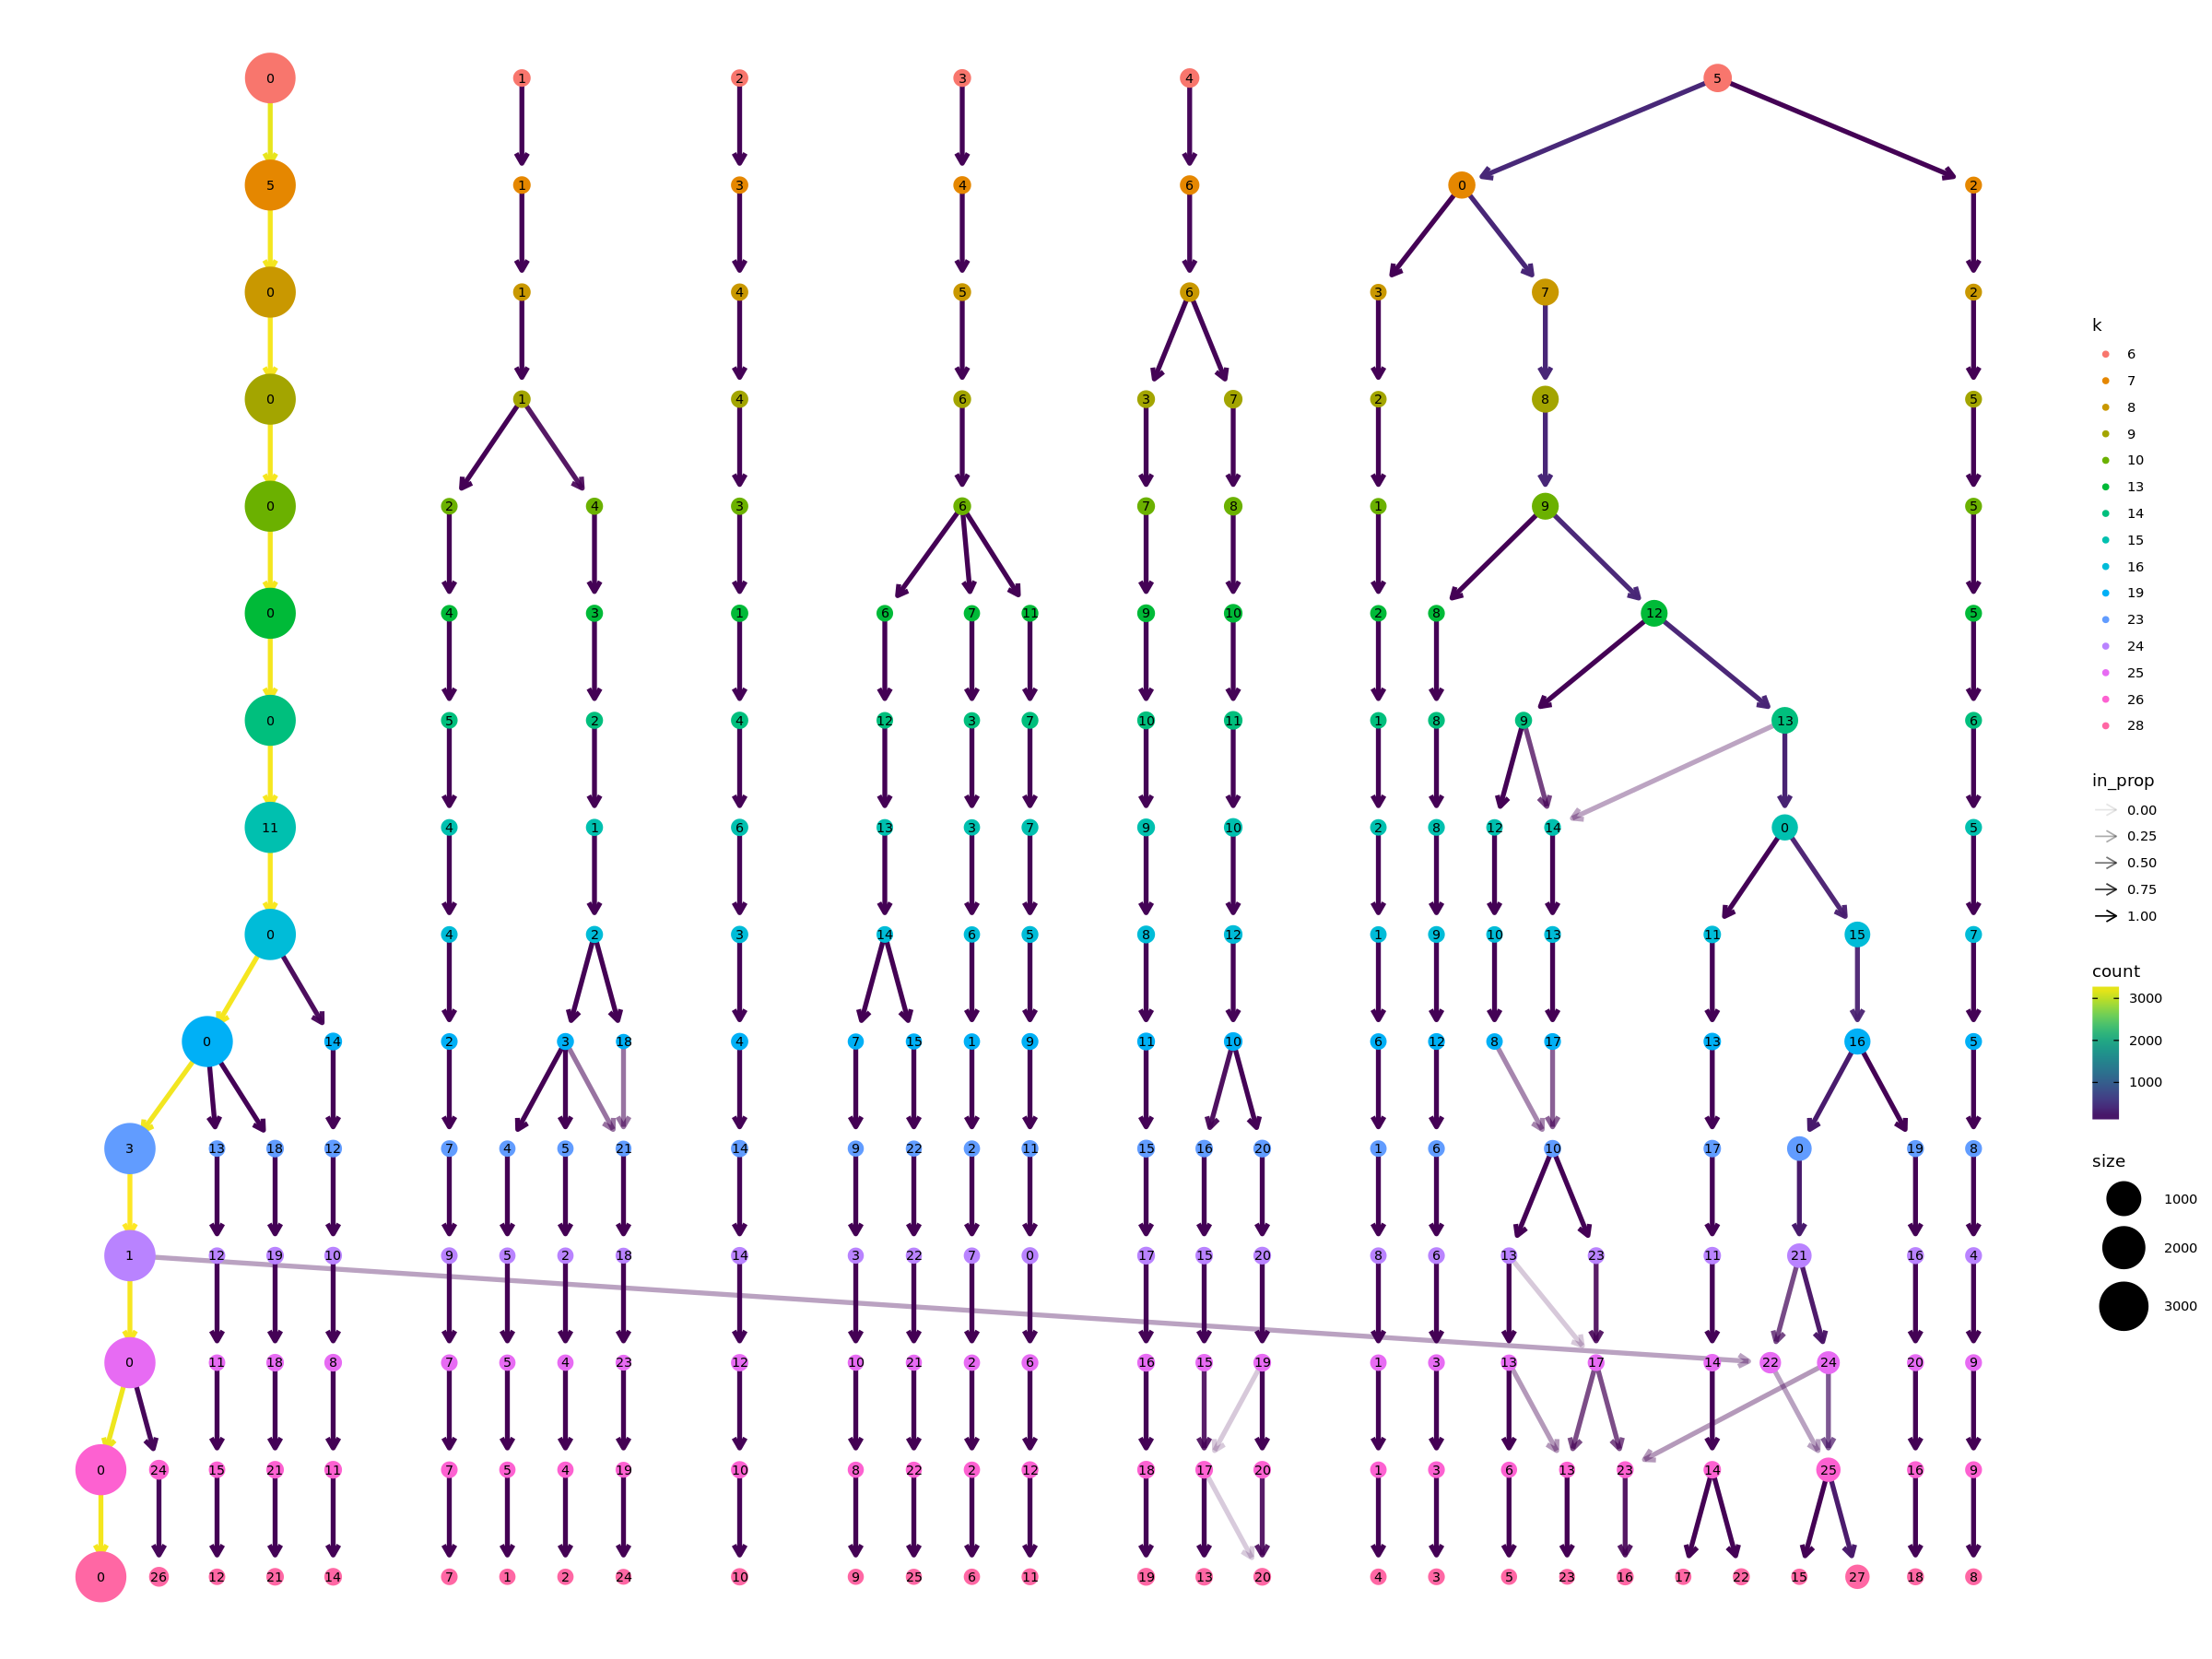

In [14]:
options(repr.plot.width = 20, repr.plot.height = 15)
clustree(data, prefix = "k")

ggsave(
  file.path(OUTPUT_FIG_DIR, "clustering_tree.svg"),
  height = 15,
  width = 20,
  scale = 1,
)